In [1]:
import matplotlib.pyplot as ptl
import numpy as np
import pandas as pd
import scipy.stats as stats
import pymc3 as pm
import theano.tensor as tt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
np.random.seed(1984)
%matplotlib inline

In [3]:
# El problema de la moneda
# de 100 lanzamientos 80 caras

n = 100
caras = 80


In [4]:
# Creamos el modelo
niter = 2000
with pm.Model() as modelo_moneda:
    # a_priori
    p = pm.Beta('p', alpha=2, beta=2)
    # likelihood
    y = pm.Binomial('y', n=n, p=p, observed=caras)

In [5]:
with modelo_moneda:
    trace = pm.sample(niter)


C:\Users\anton\anaconda3\envs\Python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 23 seconds.
The acceptance probability does not match the target. It is 0.8814726728074602, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\anton\anaconda3\envs\Python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
C:\Users\anton\anaconda3\envs\Python\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


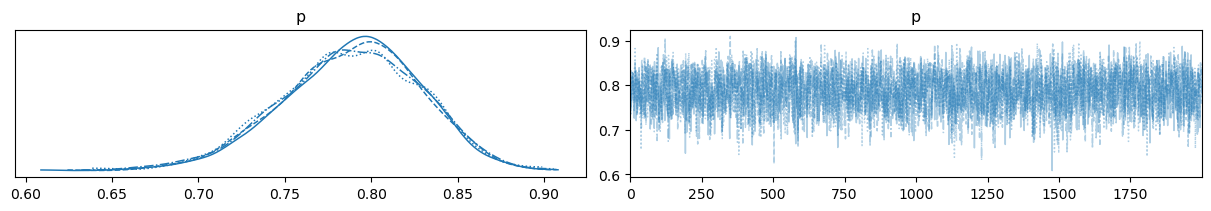

In [13]:
pm.traceplot(trace, var_names=['p'])
pass

In [12]:
pm.summary(trace)

C:\Users\anton\anaconda3\envs\Python\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.788,0.04,0.712,0.86,0.001,0.0,3292.0,5373.0,1.0
